<a href="https://www.kaggle.com/code/nickolasdodd/aim111-categorical-data-exploration?scriptVersionId=244414833" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# AIM 111 Lab 1: Exploring Categorical Data in the Spaceship Titanic Dataset

In [1]:
from IPython.display import Image, display

image_path = 'https://storage.googleapis.com/kaggle-media/competitions/Spaceship%20Titanic/joel-filipe-QwoNAhbmLLo-unsplash.jpg'
display(Image(url=image_path))

Welcome to your first major data exploration assignment! In this notebook, you'll apply core data understanding skills to the Spaceship Titanic dataset. We will focus **exclusively on categorical features** for this assignment.

**Learning Objectives:**
1. Load and get a first look at a new dataset. 📈
2. Identify and distinguish categorical columns. 🏷️
3. Understand the difference between nominal and ordinal categories, and identify high-cardinality categoricals. ⚖️
4. Explore categorical variables through: 
   * Missing value inspection ❓
   * Unique value counts and distributions (value_counts, countplots) 📊
   * Basic feature engineering for complex categoricals (e.g., splitting the `Cabin` column) 🛠️
   * Grouping and aggregation (`groupby`) 🧮
   * Filtering subsets of data based on categorical criteria 🔍

**Dataset:** Spaceship Titanic 🛸 - Predicting which passengers were transported to an alternate dimension.
You can find more about the dataset [here](https://www.kaggle.com/competitions/spaceship-titanic).

**Instructions:**
- Read the markdown explanations carefully.
- Execute the provided code cells.
- Complete the tasks below, which will require you to write code or answer questions in markdown cells.
- Feel free to add notes and experiment with the code to deepen your understanding.
- Contact nickolas.dodd@cgc.edu for questions or more information.

## 0. Setup - Import Libraries

Let's start by importing the necessary libraries for data manipulation and visualization.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set some display options for better readability
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
sns.set_style('whitegrid')

## 1. Getting Started – Load and Overview of the Data

First, we need to load the training dataset (`train.csv`) for the Spaceship Titanic competition. We'll then take an initial look at its structure and content.

### Accessing the Dataset in a Kaggle Notebook
If you are working within a Kaggle Notebook environment for the Spaceship Titanic competition, adding data (or other kinds of inputs) is easy! Go to File --> Add Input then search for "Spaceship Titanic". The input we want to add should be the first result, shown in the image below. Click the "+" sign next to the name of this input to make it available to your current notebook.

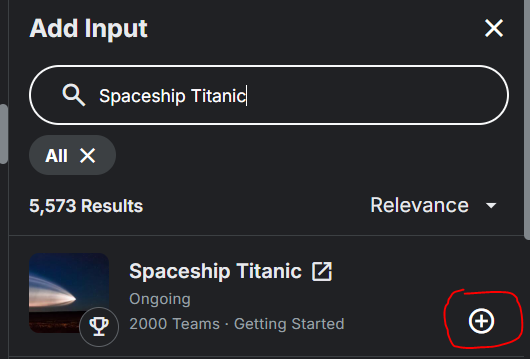

Afterwards, you should see the data from this competition appear under the "Input" section on the right hand side:

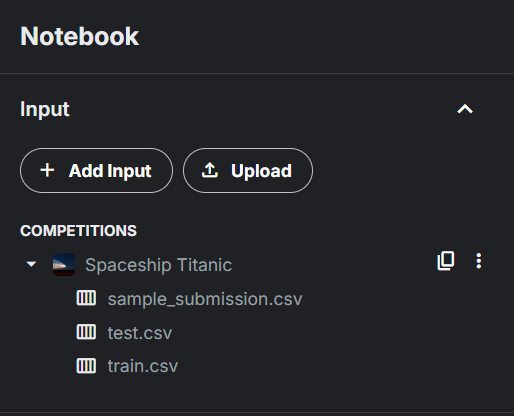

Typically, the training data will be at a path like `'/kaggle/input/spaceship-titanic/train.csv'`.

**For this assignment, if you are running this notebook locally, ensure `train.csv` is in the same directory, or update the path in the cell below.**

In [3]:
# Define the path to your data
data_path = '/kaggle/input/spaceship-titanic/train.csv' # <-- Update this path if necessary

train_df = pd.read_csv(data_path)

Now, as your first steps towards exploring this dataset, display some useful information about `train_df` such as it's shape, descriptive statistics, summary information (using `.info()`), and first few samples.

In [4]:
# TODO: Your code here!

### 1.1 Initial Look at Key Categorical Distributions

Before a formal identification, let's quickly examine the distributions of some obviously categorical columns to get a feel for the data.

First, identify which of the variables in the dataset are categorical variables. It may be helpful to look at the description of the dataset at it's homepage [here](https://www.kaggle.com/c/spaceship-titanic/data). Categorical data represents categories, chatacteristics, or groups. They are often represented by either text or booleans. Pandas' `select_dtypes` method may be useful here. `object` dtype usually indicates a string column while `bool` is used for boolean columns.

In [5]:
categorical_cols = [] # TODO: Update with list of identified categorical variables

In [6]:
categorical_cols = ['HomePlanet', 'Destination', 'CryoSleep', 'Transported', 'Cabin', 'VIP', 'PassengerId', 'Name'] # INSTRUCTOR TODO: REMOVE

### Initial Dataset Exploration

1. Are there any ordinal categorical variables, and if so, explain how they are ordered.
2. Identify which of these have **High Cardinality**. Use `train_df[column_name].nunique()` to help.
3. Are there any numerical columns that *could* be treated as categorical if binned?
4. Describe 3 observations from running `.info()` and `.describe()` on the training data.

*(Double-click here to enter your answers)*

Let's take a look at the value counts by displaying a count plot for each of the identified categorical variables:


Value counts for HomePlanet:
HomePlanet
Earth     4602
Europa    2131
Mars      1759
NaN        201
Name: count, dtype: int64


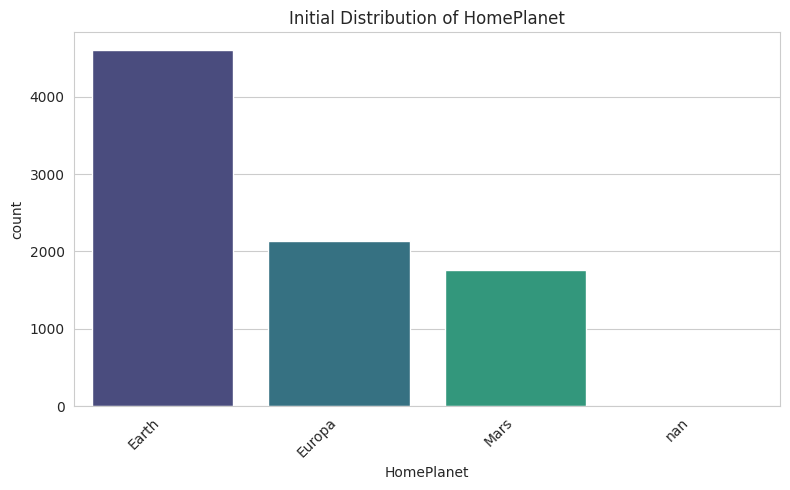


Value counts for Destination:
Destination
TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
NaN               182
Name: count, dtype: int64


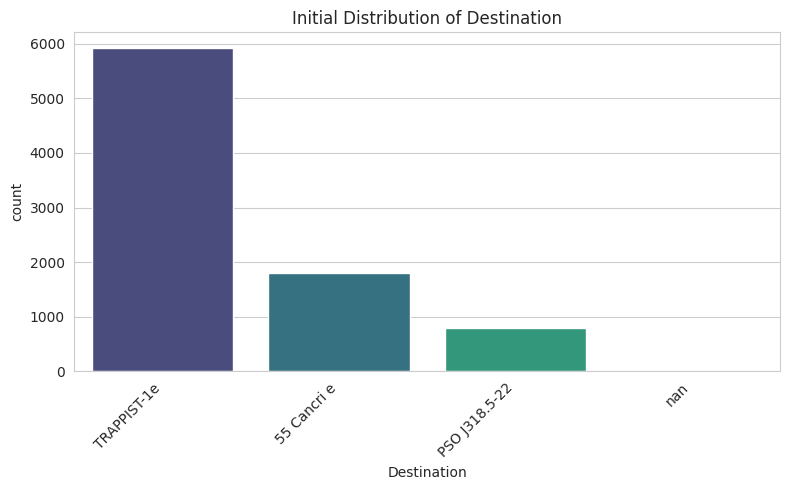


Value counts for CryoSleep:
CryoSleep
False    5439
True     3037
NaN       217
Name: count, dtype: int64


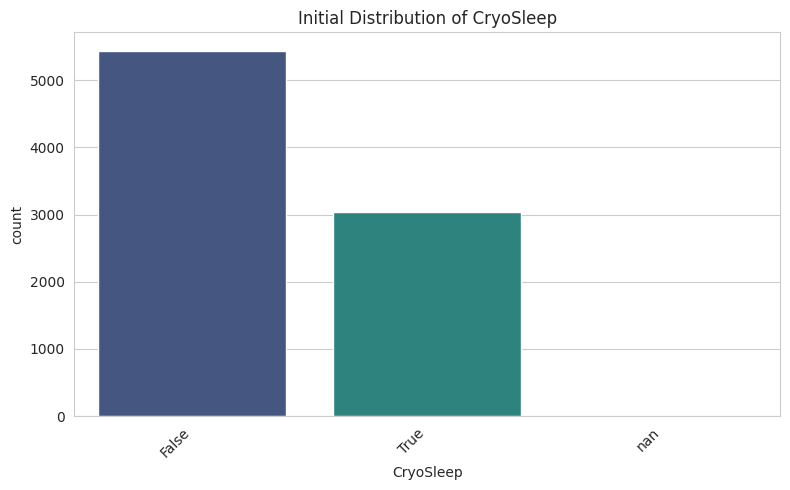


Value counts for Transported:
Transported
True     4378
False    4315
Name: count, dtype: int64


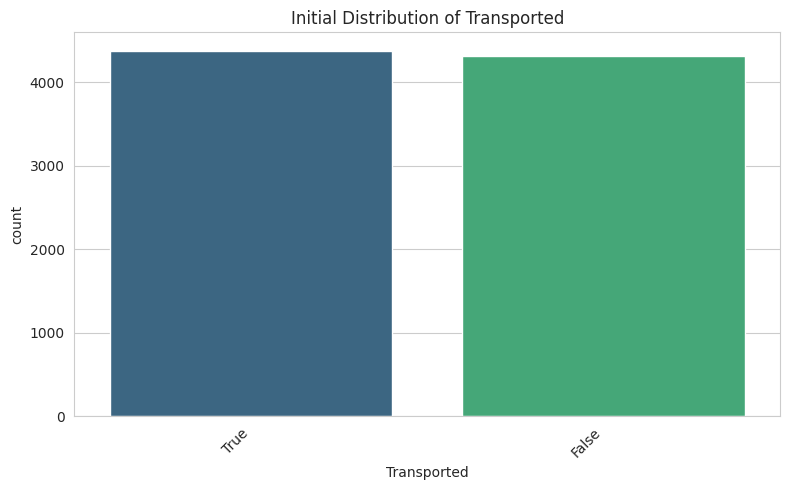


Value counts for Cabin:
Cabin
NaN        199
G/734/S      8
C/137/S      7
B/201/P      7
G/109/P      7
          ... 
G/556/P      1
E/231/S      1
G/545/S      1
G/543/S      1
C/178/S      1
Name: count, Length: 6561, dtype: int64
Too many unique values to display. Omitting count plot.

Value counts for VIP:
VIP
False    8291
NaN       203
True      199
Name: count, dtype: int64


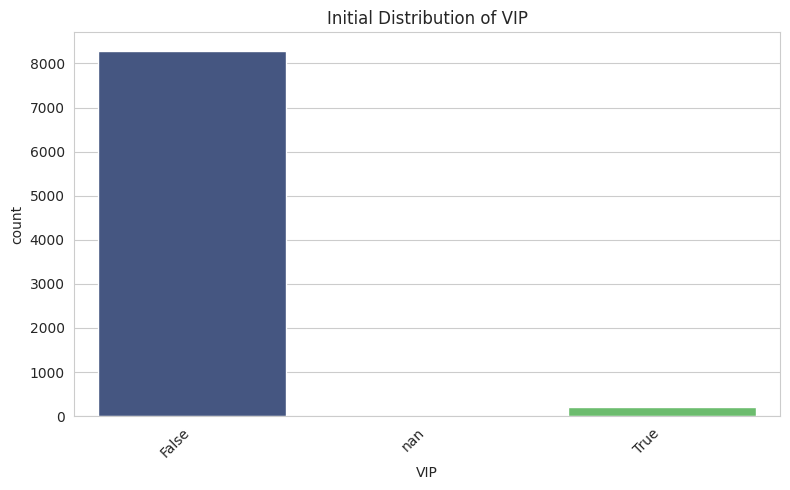


Value counts for PassengerId:
PassengerId
0001_01    1
6136_01    1
6141_01    1
6139_06    1
6139_05    1
          ..
3126_01    1
3124_03    1
3124_02    1
3124_01    1
9280_02    1
Name: count, Length: 8693, dtype: int64
Too many unique values to display. Omitting count plot.

Value counts for Name:
Name
NaN                   200
Sus Coolez              2
Elaney Webstephrey      2
Dia Cartez              2
Grake Porki             2
                     ... 
Jamela Griffy           1
Hardy Griffy            1
Salley Mckinn           1
Mall Frasp              1
Propsh Hontichre        1
Name: count, Length: 8474, dtype: int64
Too many unique values to display. Omitting count plot.


In [7]:
for col in categorical_cols:
    if col in train_df.columns:
        val_counts = train_df[col].value_counts(dropna=False) # dropna=False includes NaNs
        print(f"\nValue counts for {col}:")
        print(val_counts) 
    
        if len(val_counts) <= 10:    
            plt.figure(figsize=(8, 5))
            sns.countplot(data=train_df, x=col, order=val_counts.index, palette='viridis')
            plt.title(f'Initial Distribution of {col}')
            plt.xticks(rotation=45, ha='right')
            plt.tight_layout()
            plt.show()
        else:
            print(f'Too many unique values to display. Omitting count plot.')

### Interpret Initial Distributions

1.  Which is the most frequent planet of origin?
2.  What are the top two destinations of passengers onboard the ship?
3.  What do you observe about the distribution of the target variable `Transported`? Is it heavily skewed towards one outcome?
4.  Do you have any hypothesis about how these variables may affect the outcome (`Transported`) at this stage?
5.  Write down two more of your own observations about the categorical data in this dataset.

*(Double-click here to enter your answers)*

## 2. Exploring Categorical Variables: In-depth Analysis

Now, let's dive deeper into our categorical features.

### 2.1 Missing Values in Categorical Columns

Missing data is common. We need to identify which categorical columns have missing values and how many.

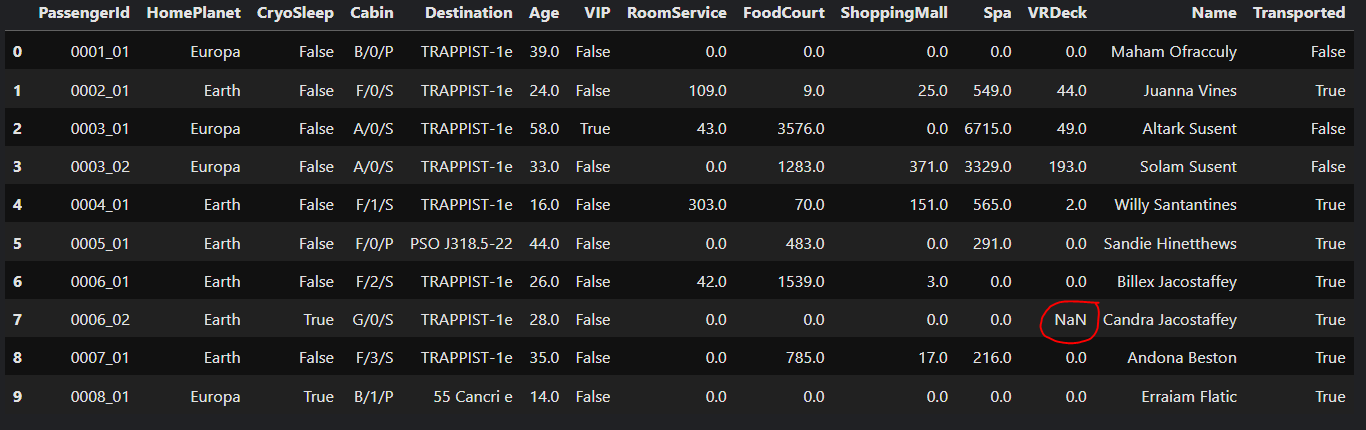

#### 2.1.1 Identification of Missing Values

We'll count the percentage of missing values for each of our primary categorical columns. A heatmap can also give a quick visual overview of where missingness occurs.

In [8]:
missing_cat = (100 * train_df[categorical_cols].isna().sum()/len(train_df)).sort_values(ascending=False).round(2)
print("⚠️ Percentage of Missing Values by Categorical Column ⚠️")
missing_cat

⚠️ Percentage of Missing Values by Categorical Column ⚠️


CryoSleep      2.50
VIP            2.34
HomePlanet     2.31
Name           2.30
Cabin          2.29
Destination    2.09
Transported    0.00
PassengerId    0.00
dtype: float64

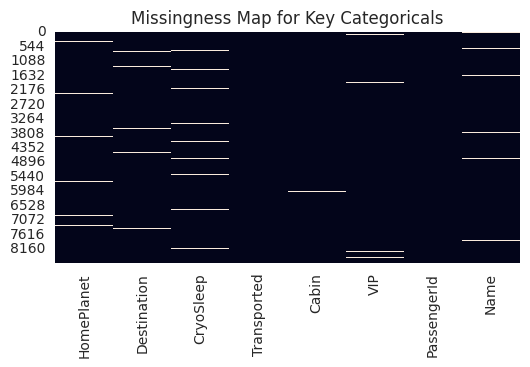

In [9]:
plt.figure(figsize=(6,3))
sns.heatmap(train_df[categorical_cols].isna(), cbar=False)
plt.title("Missingness Map for Key Categoricals")
plt.show()

### Interpret Missing Value Heatmap

1.  What does each horizontal line in the heatmap represent?
2.  What does a yellow mark (or the lighter color in your chosen `cmap`) indicate on the heatmap for a specific column and row?
3.  Are there any columns that appear to have a large proportion of missing values based on the heatmap? Does this match the printed percentages?

*(Double-click here to enter your answer)*

#### 2.1.2 Missing Value Strategies

Before choosing how to handle missing values, consider:
   - **Source of the data:** Is a field optional?
   - **Pattern of missingness:** Random, or concentrated in subgroups?
   - **Consequences for analysis:** Will dropping rows reduce sample size too much? Could imputing distort relationships?
   - **Domain knowledge:** Does "no response" mean "not applicable" or "no participation"? Does missingness itself carry information?

**Common strategies for categorical data:**
1.  **Drop Rows/Columns:** Use if missingness is minimal or the feature is not critical.
2.  **Mode Imputation:** Fill with the most frequent category. Simple, but can distort distribution if many values are missing and inject bias.
3.  **"Missing" Category:** Treat missing values as a distinct category (e.g., fill with "Unknown"). This acknowledges that missingness might be informative.

**Discussing Handling Strategies**

1. How much data will you drop from this dataset if you drop any row where there is a missing value?
2. How would you determine if a field is optional for your analysis?
3. Sometimes other values besides `NaN` can imply missing values. For each of the following scenarios, describe what values might be used to represent missingness, and why it is important to detect and handle them correctly."
    * Survey responses (categorical variables)
    * System-generated dates
    * Numeric measurements from sensors
    * Database exports into CSV files

*(Double-click here to enter your answer)*

#### 2.1.3 Visualizing the Effect of Missing Value Strategies

Let's compare the distribution of a couple of categorical features (`HomePlanet`, `Destination`) under three simple strategies:
1.  **Original:** Data as-is, including NaNs.
2.  **DropNA:** Rows with any missing values in *that specific column* removed for the purpose of that plot.
3.  **Impute Mode:** Missing values in the column filled with the column’s mode.
4.  **Flag as 'Missing':** Missing values treated as their own “Missing” category.

This helps appreciate how each approach alters observed category frequencies.


--- Analyzing effects on 'HomePlanet' distribution ---


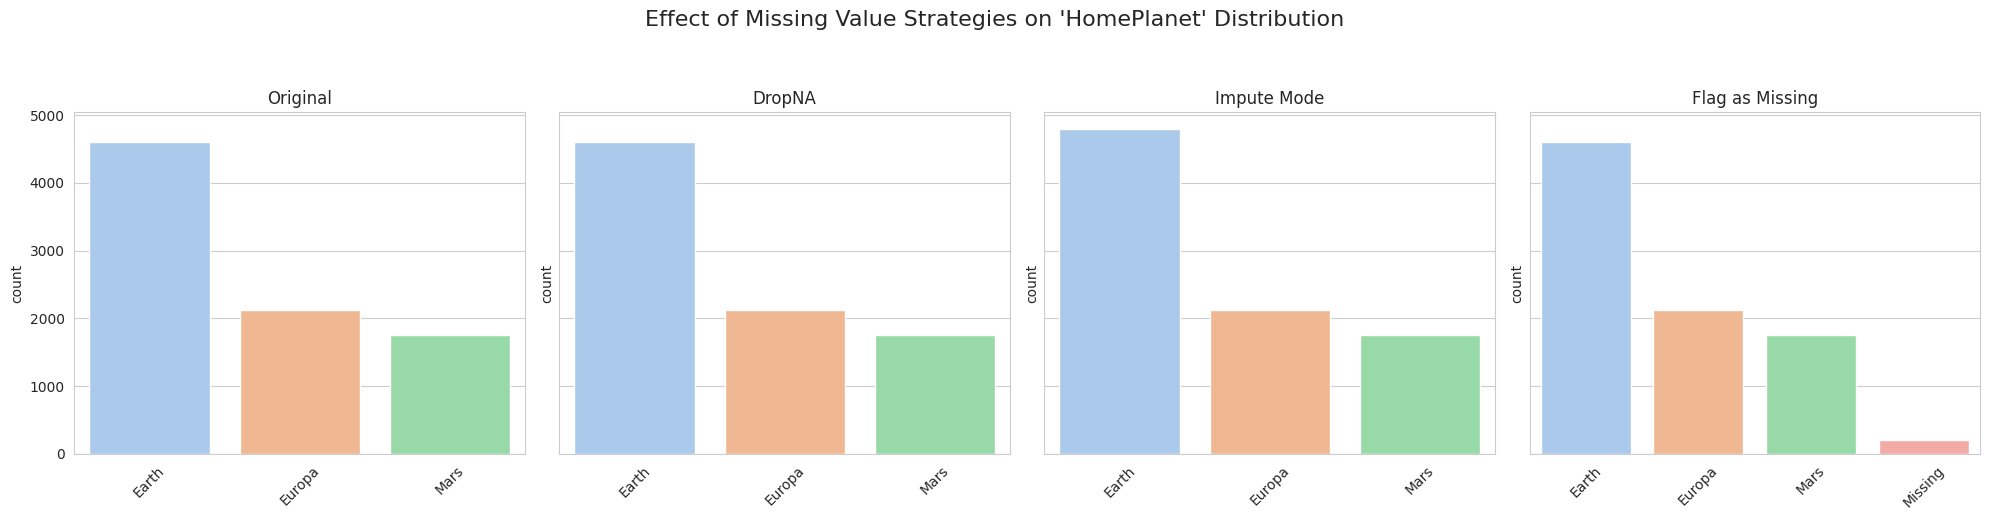


--- Analyzing effects on 'Destination' distribution ---


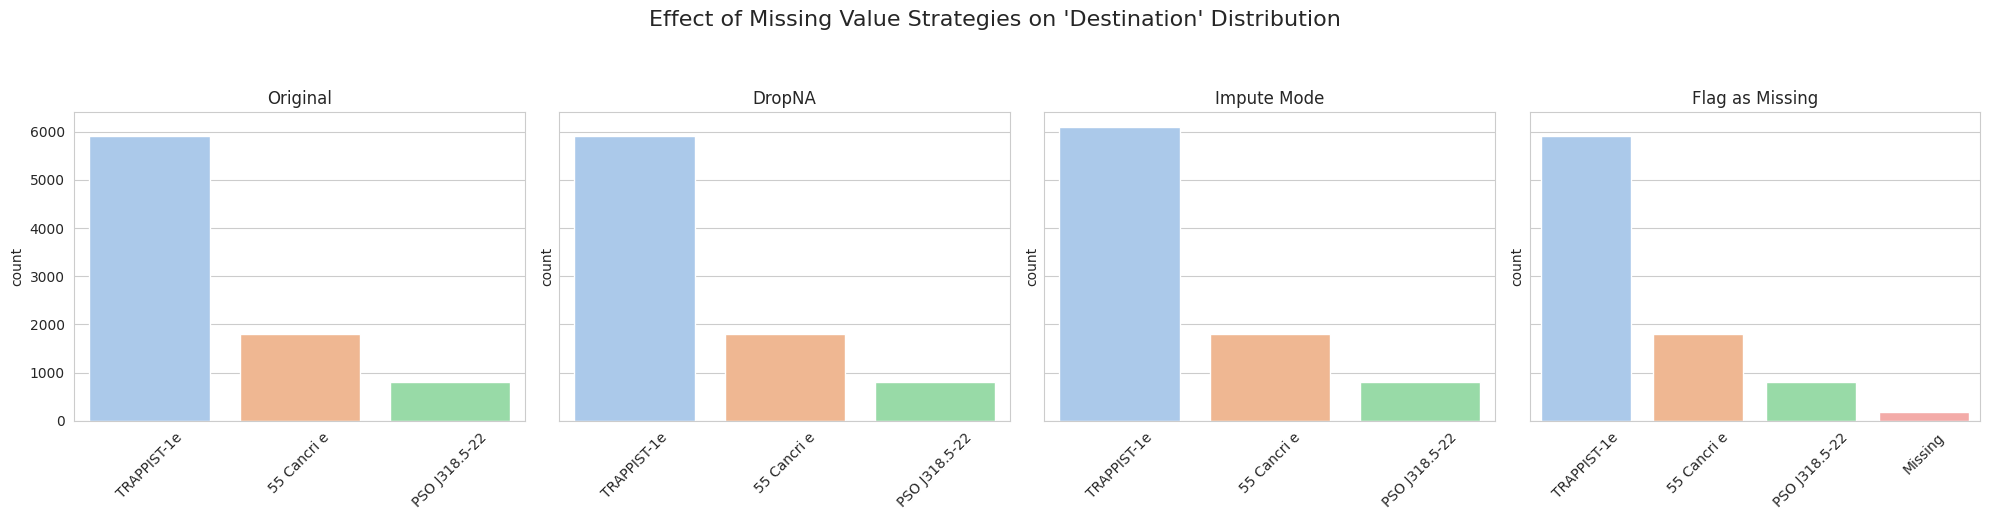


--- Analyzing effects on 'CryoSleep' distribution ---


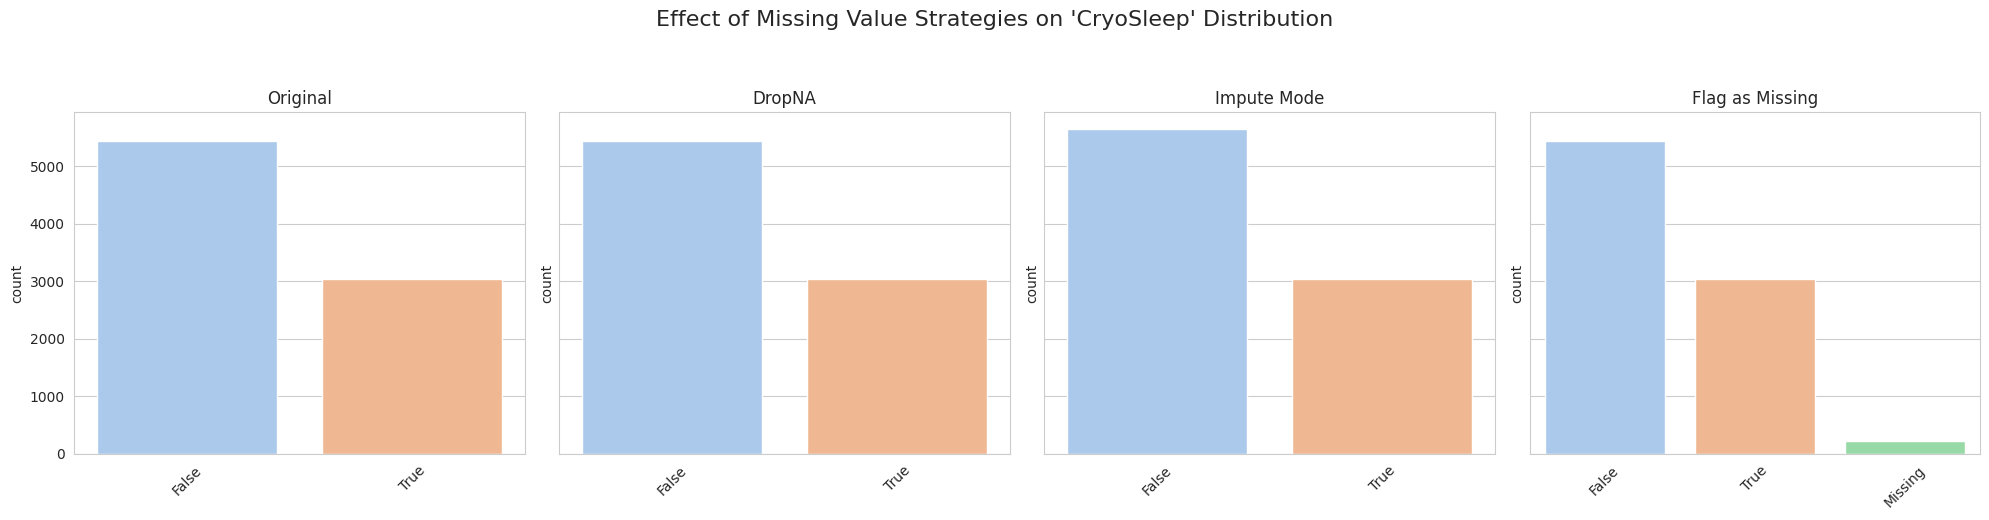


--- Analyzing effects on 'Transported' distribution ---


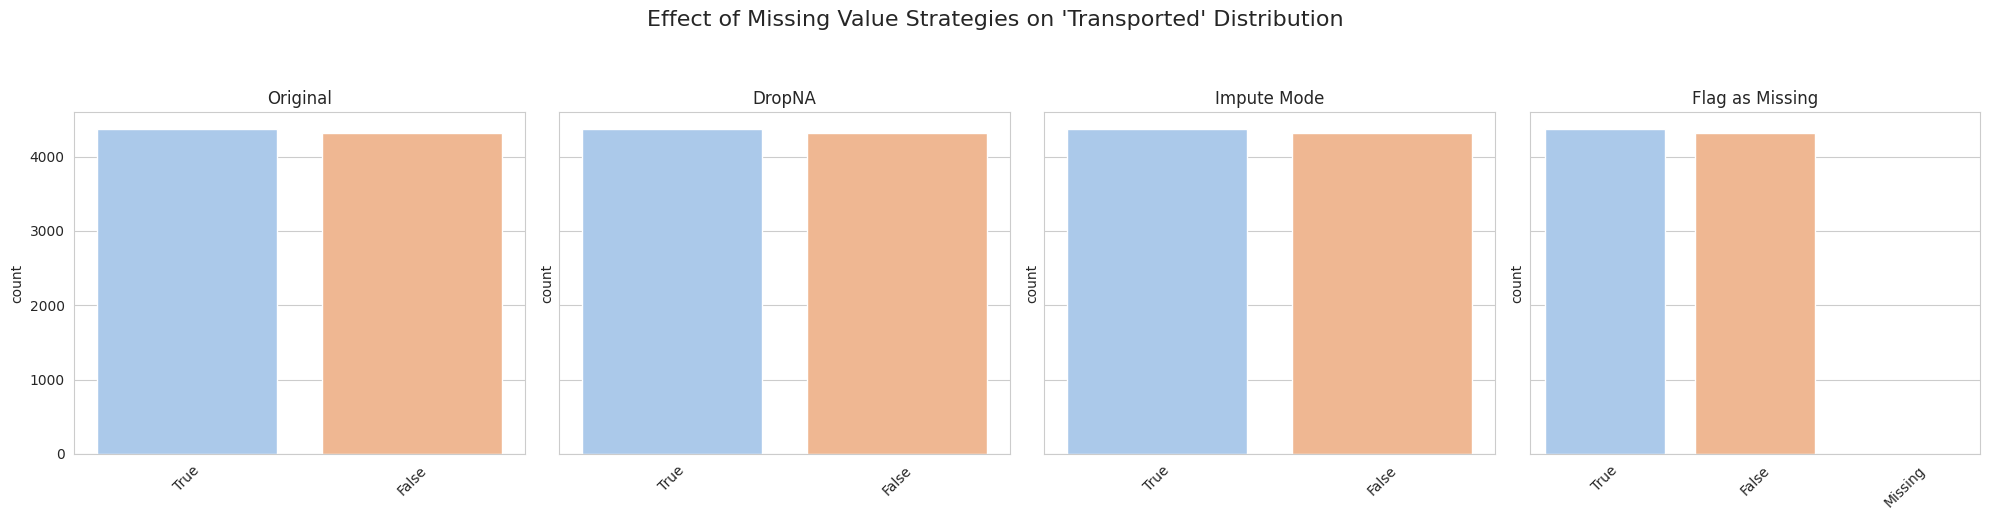


--- Analyzing effects on 'VIP' distribution ---


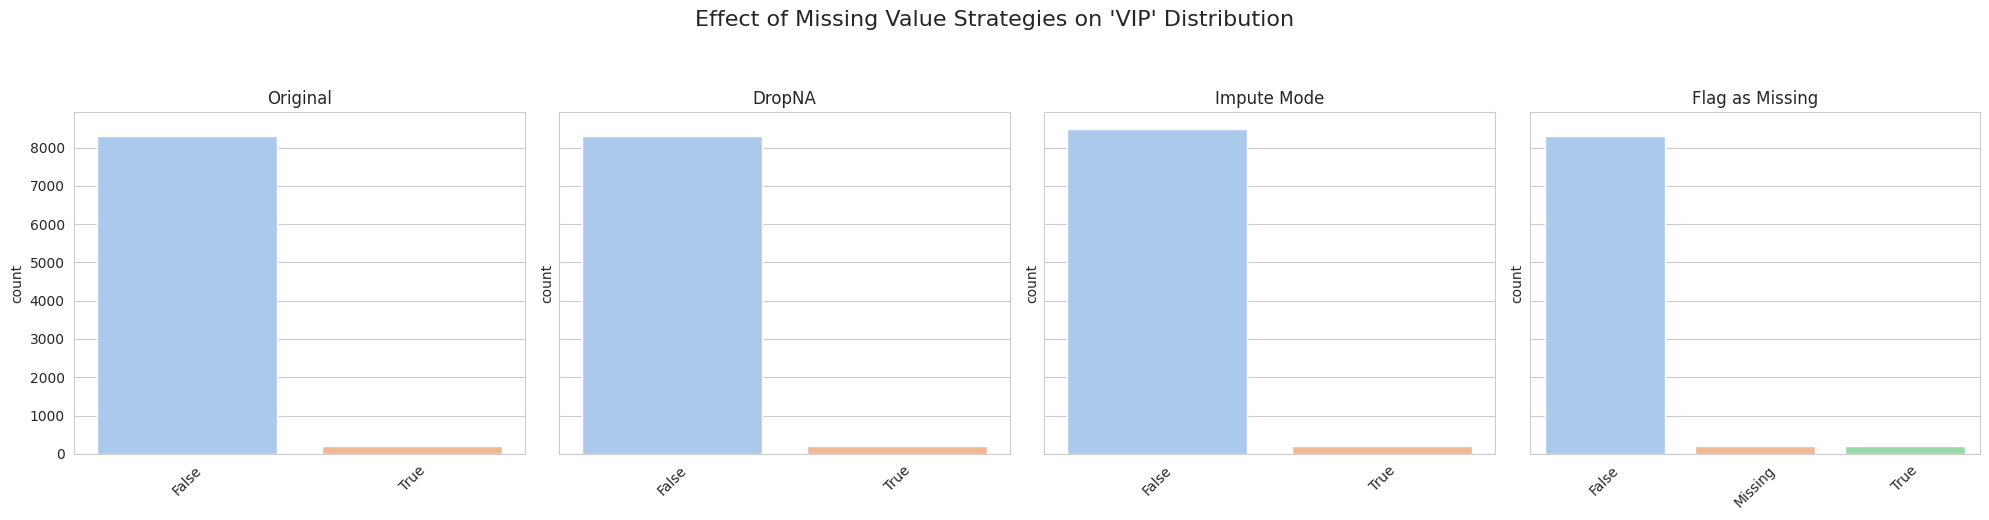

In [10]:
import warnings
warnings.simplefilter("ignore", category=FutureWarning)

cols_for_missing_strat_viz = [col for col in categorical_cols if train_df[col].nunique() <= 10]


for col in cols_for_missing_strat_viz:
    print(f"\n--- Analyzing effects on '{col}' distribution ---")
    df_orig_col = train_df[[col]].copy() # original dataFrame column
    df_drop_col = train_df[[col]].copy().dropna(subset=[col]) # DropNA strategy for this column

    # impute with mode for this column
    df_impute_col = train_df[[col]].copy()
    mode_val = df_impute_col[col].mode()[0] if not df_impute_col[col].mode().empty else 'Unknown' # Handle empty mode
    df_impute_col[col] = df_impute_col[col].fillna(mode_val)


    # 4. Flag missing for this column
    df_flag_col = train_df[[col]].copy()
    if not isinstance(df_flag_col[col].dtype, pd.CategoricalDtype):
        df_flag_col[col] = df_flag_col[col].astype('category')
    if 'Missing' not in df_flag_col[col].cat.categories:
         df_flag_col[col] = df_flag_col[col].cat.add_categories('Missing')
    df_flag_col[col] = df_flag_col[col].fillna('Missing')

    # Create a dictionary of these dataframes for plotting
    strategies = {
        'Original': df_orig_col,
        'DropNA': df_drop_col,
        'Impute Mode': df_impute_col,
        'Flag as Missing': df_flag_col
    }

    # Plot for the current categorical column
    fig, axes = plt.subplots(1, 4, figsize=(20, 5), sharey=True)
    fig.suptitle(f"Effect of Missing Value Strategies on '{col}' Distribution", y=1.03, fontsize=16)

    for i, (name, dset) in enumerate(strategies.items()):
        ax = axes[i]
        if not dset.empty:
            order = dset[col].value_counts(dropna=(name=='Original' or name=='DropNA')).index
            sns.countplot(data=dset, x=col, order=order, ax=ax, palette='pastel')
            ax.set_title(name)
            ax.set_xlabel('')
            ax.tick_params(axis='x', rotation=45)#, ha='right')
        else:
            ax.set_title(f"{name} (Empty)")
            ax.text(0.5, 0.5, 'No data after operation',
                    horizontalalignment='center', verticalalignment='center',
                    transform=ax.transAxes)
    plt.tight_layout(rect=[0, 0, 1, 0.97]) # Adjust layout to make space for suptitle
    plt.show()

### Interpret Missing Value Strategy Plots

For the columns you analyzed:
1.  How does the **DropNA** strategy affect the distribution compared to the **Original**? Specifically, note any changes in the relative frequencies of the categories.
2.  How does the **Impute Mode** strategy affect the distribution? Which category's count increases the most?
3.  How does the **Flag as Missing** strategy affect the distribution? What new category appears?
4.  Based on these visualizations and the percentage of missing data for these columns, which strategy (DropNA, Impute Mode, Flag as Missing) do you think is most appropriate for `HomePlanet` for general EDA and potential future modeling? Why? What about for `Destination`?

*(Double-click here to enter your answers)*

### 2.2 Handling High Cardinality & Feature Engineering: The `Cabin` Column

The `Cabin` column (e.g., `B/0/P`) has many unique values. It seems to contain three pieces of information: Deck / Number / Side (Port or Starboard).
Splitting this into three new categorical features can be more useful for analysis and modeling.

In [11]:
train_df['Cabin'].head()

0    B/0/P
1    F/0/S
2    A/0/S
3    A/0/S
4    F/1/S
Name: Cabin, dtype: object

First 5 rows with new Cabin features:


,Cabin,Deck,Cabin_Num_Str,Side
0,B/0/P,B,0,P
1,F/0/S,F,0,S
2,A/0/S,A,0,S
3,A/0/S,A,0,S
4,F/1/S,F,1,S



Value counts for Deck:
Deck
F          2794
G          2559
E           876
B           779
C           747
D           478
A           256
Unknown     199
T             5
Name: count, dtype: int64


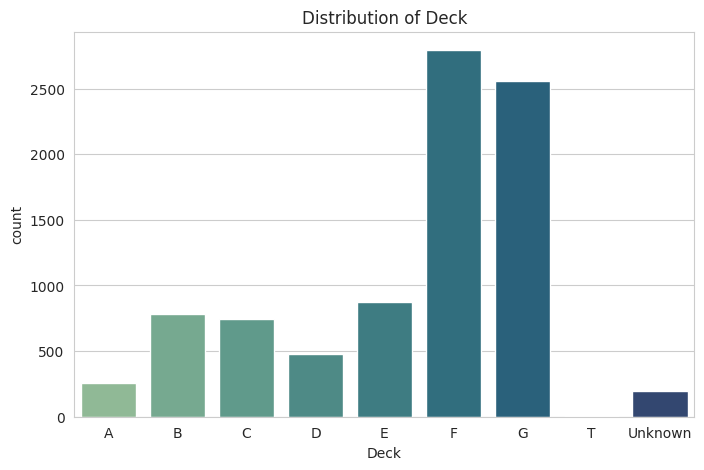


Value counts for Side:
Side
S          4288
P          4206
Unknown     199
Name: count, dtype: int64


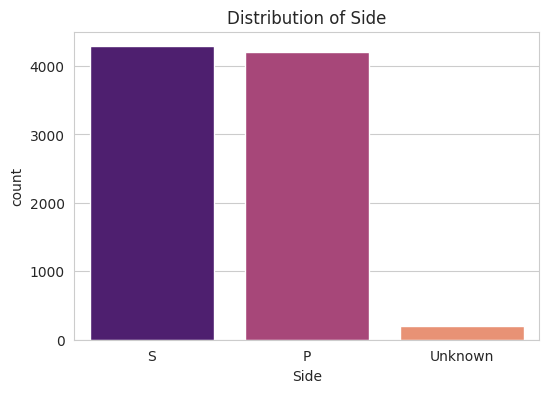

In [12]:
# Split the 'Cabin' column. Handle NaNs by filling them with "Unknown" string.
cabin_parts = train_df['Cabin'].fillna('Unknown/Unknown/Unknown').str.split('/', expand=True)
train_df['Deck'] = cabin_parts[0]
train_df['Cabin_Num_Str'] = cabin_parts[1]
train_df['Side'] = cabin_parts[2]

print("First 5 rows with new Cabin features:")
display(train_df[['Cabin', 'Deck', 'Cabin_Num_Str', 'Side']].head())

# Analyze the new 'Deck' feature
print("\nValue counts for Deck:")
print(train_df['Deck'].value_counts(dropna=False))
plt.figure(figsize=(8, 5))
sns.countplot(data=train_df, x='Deck', order=train_df['Deck'].value_counts(dropna=False).index.sort_values(), palette='crest')
plt.title('Distribution of Deck')
plt.show()

# Analyze the new 'Side' feature
print("\nValue counts for Side:")
print(train_df['Side'].value_counts(dropna=False))
plt.figure(figsize=(6, 4))
sns.countplot(data=train_df, x='Side', order=train_df['Side'].value_counts(dropna=False).index, palette='magma')
plt.title('Distribution of Side')
plt.show()

### Utility of Cabin Splitting

1. Why is splitting the `Cabin` column into `Deck`, `Cabin_Num_Str`, and `Side` potentially more useful for analysis than using the original `Cabin` string directly?
2.  Looking at the distributions of `Deck` and `Side`, do you see any interesting patterns?

*(Double-click here to enter your answers)*

### 2.3 GroupBy and Aggregation with Categorical Features

`groupby()` is powerful for understanding relationships. We can group by one or more categorical features and then calculate aggregate statistics (like mean, count, sum) for other features or for the target variable.

Average Age by HomePlanet:
HomePlanet
Earth     26.1
Europa    34.4
Mars      29.3
Name: Age, dtype: float64

Transported Rate (%) by CryoSleep Status:
CryoSleep
False    33.0
True     82.0
Name: Transported, dtype: float64


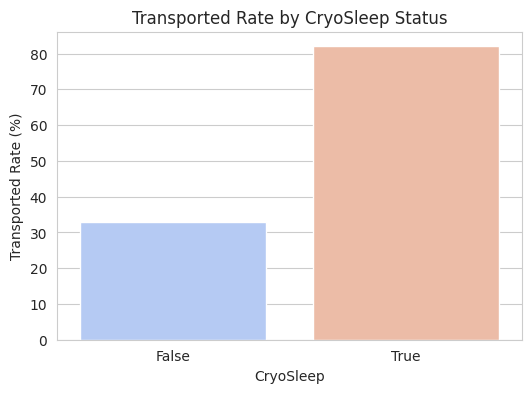


Counts: HomePlanet vs Destination:
Destination  55 Cancri e  PSO J318.5-22  TRAPPIST-1e
HomePlanet                                          
Earth                690            712         3101
Europa               886             19         1189
Mars                 193             49         1475


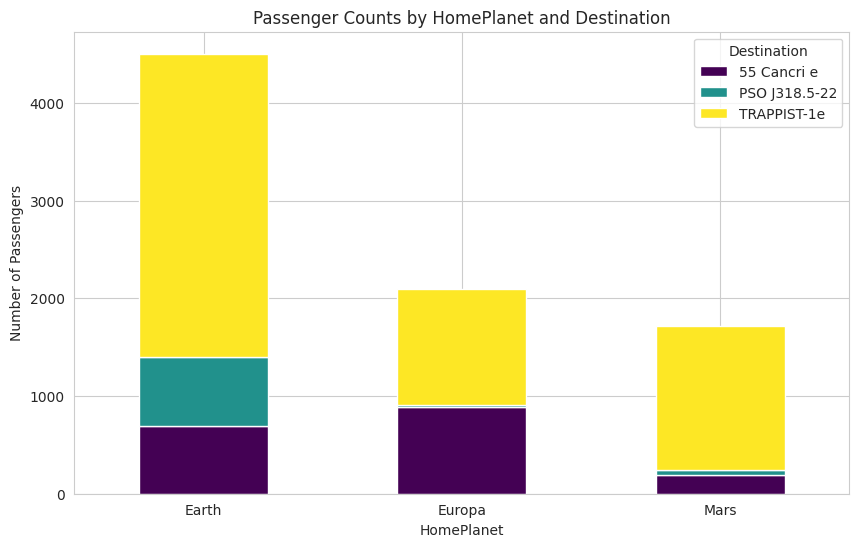

In [13]:
# Example 1: Average age of passengers by HomePlanet
avg_age_by_planet = train_df.groupby('HomePlanet')['Age'].mean().round(1)
print("Average Age by HomePlanet:")
print(avg_age_by_planet)

# Example 2: Transported rate by CryoSleep status
transported_by_cryo = train_df.groupby('CryoSleep')['Transported'].mean().round(2) * 100 # as percentage
print("\nTransported Rate (%) by CryoSleep Status:")
print(transported_by_cryo)
# Visualize transported rate by CryoSleep
plt.figure(figsize=(6,4))
sns.barplot(x=transported_by_cryo.index, y=transported_by_cryo.values, palette='coolwarm')
plt.title('Transported Rate by CryoSleep Status')
plt.ylabel('Transported Rate (%)')
plt.show()
    
# Example 3: Counts of HomePlanet vs Destination
planet_dest_counts = train_df.groupby(['HomePlanet', 'Destination']).size().unstack(fill_value=0)
print("\nCounts: HomePlanet vs Destination:")
print(planet_dest_counts)
if not planet_dest_counts.empty:
    planet_dest_counts.plot(kind='bar', stacked=True, figsize=(10,6), colormap='viridis')
    plt.title('Passenger Counts by HomePlanet and Destination')
    plt.ylabel('Number of Passengers')
    plt.xticks(rotation=0)
    plt.show()

### Interpret GroupBy Results

1.  Based on the `transported_by_cryo` output and bar plot, what can you say about the relationship between being in cryosleep and being transported?
2.  Look at the `planet_dest_counts` table/plot. What is the most common destination for passengers from 'Earth'? What about for passengers from 'Mars'?

### VIP Status and Transportation

1.  Perform a `groupby` analysis to find the transportation rate (`Transported`) for each `VIP` status.
2.  Print the result.
3.  Create a bar plot to visualize this relationship.
4.  Briefly interpret the result: Does being a VIP seem to affect transportation chances significantly based on this?

Transported Rate (%) by VIP Status:
VIP
False    51.0
True     38.0
Name: Transported, dtype: float64


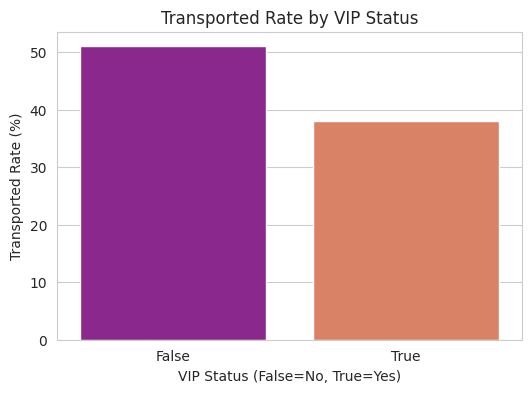

In [14]:
# TODO: Your code here!
transported_by_vip = train_df.groupby('VIP')['Transported'].mean().round(2) * 100
print("Transported Rate (%) by VIP Status:")
print(transported_by_vip)

plt.figure(figsize=(6,4))
sns.barplot(x=transported_by_vip.index, y=transported_by_vip.values, palette='plasma')
plt.title('Transported Rate by VIP Status')
plt.ylabel('Transported Rate (%)')
plt.xlabel('VIP Status (False=No, True=Yes)')
plt.show()

*(Double-click here to enter your interpretation)*

### Cabin Deck/Side and Transportation

1.  Group the data by `Deck` and calculate the mean of `Transported` for each deck. Visualize this with a bar plot.
2.  Group the data by `Side` and calculate the mean of `Transported` for each side. Visualize this.
3.  Interpret your findings: Do certain decks or sides of the ship seem to have higher transportation rates?

Transported Rate (%) by Deck:
Deck
B          73.0
C          68.0
G          52.0
Unknown    50.0
A          50.0
F          44.0
D          43.0
E          36.0
T          20.0
Name: Transported, dtype: float64


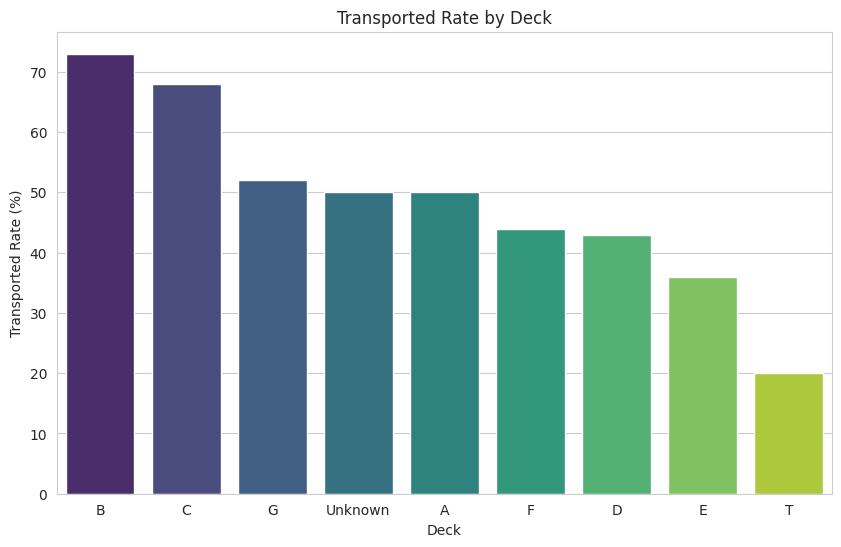


Transported Rate (%) by Side:
Side
S          56.0
Unknown    50.0
P          45.0
Name: Transported, dtype: float64


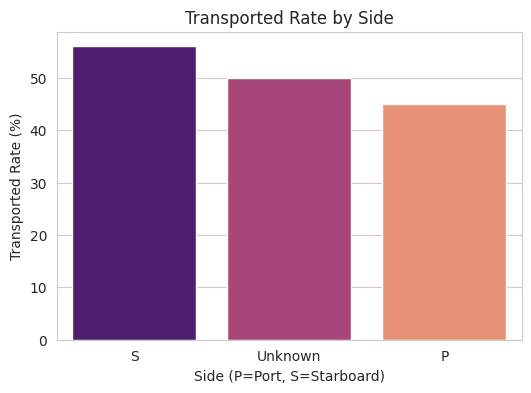

In [15]:
# TODO: Your code here!

# 1. Deck vs Transported
transported_by_deck = train_df.groupby('Deck')['Transported'].mean().sort_values(ascending=False).round(2) * 100
print("Transported Rate (%) by Deck:")
print(transported_by_deck)
plt.figure(figsize=(10,6))
sns.barplot(x=transported_by_deck.index, y=transported_by_deck.values, palette='viridis',
            order=transported_by_deck.index) # Order by sorted rate
plt.title('Transported Rate by Deck')
plt.ylabel('Transported Rate (%)')
plt.xlabel('Deck')
plt.show()

# 2. Side vs Transported
transported_by_side = train_df.groupby('Side')['Transported'].mean().sort_values(ascending=False).round(2) * 100
print("\nTransported Rate (%) by Side:")
print(transported_by_side)
if not transported_by_side.empty:
    plt.figure(figsize=(6,4))
    sns.barplot(x=transported_by_side.index, y=transported_by_side.values, palette='magma',
               order=transported_by_side.index) # Order by sorted rate
    plt.title('Transported Rate by Side')
    plt.ylabel('Transported Rate (%)')
    plt.xlabel('Side (P=Port, S=Starboard)')
    plt.show()

*(Double-click here to enter your interpretation)*

### HomePlanet, Destination, and Age

1.  Group the data by `HomePlanet` AND `Destination`.
2.  For each group, calculate the average `Age` and the `size` (number of passengers).
3.  Display the result. (Hint: use `.agg({'Age': 'mean', 'PassengerId': 'size'})` and rename columns for clarity).
4.  Are there any combinations of HomePlanet and Destination with notably older or younger average ages? Or very few passengers?

In [16]:
# TODO: Your code here!

age_size_by_planet_dest = (
    train_df.groupby(['HomePlanet', 'Destination'])
      .agg(avg_age=('Age', 'mean'), n_passengers=('PassengerId', 'size'))
      .round({'avg_age': 1}) # Round average age to 1 decimal place
      .reset_index()
)
print("Average Age and Passenger Count by HomePlanet and Destination:")
display(age_size_by_planet_dest.sort_values(by=['HomePlanet', 'Destination']))

Average Age and Passenger Count by HomePlanet and Destination:


,HomePlanet,Destination,avg_age,n_passengers
0,Earth,55 Cancri e,23.4,690
1,Earth,PSO J318.5-22,26.7,712
2,Earth,TRAPPIST-1e,26.5,3101
3,Europa,55 Cancri e,34.3,886
4,Europa,PSO J318.5-22,36.4,19
5,Europa,TRAPPIST-1e,34.4,1189
6,Mars,55 Cancri e,27.2,193
7,Mars,PSO J318.5-22,36.6,49
8,Mars,TRAPPIST-1e,29.2,1475


*(Double-click here to enter your interpretation)*

### 2.4 Filtering Subsets based on Categorical Features

Filtering allows us to select specific rows from the DataFrame that meet certain criteria. This is useful for focusing on particular subgroups.

In [17]:
# Example 1: Filter for passengers whose HomePlanet is 'Europa'
europa_passengers = train_df[train_df['HomePlanet'] == 'Europa']
print(f"Number of passengers from Europa: {len(europa_passengers)}")
print(europa_passengers.head())

# Example 2: Filter for passengers who are in CryoSleep AND are VIPs
cryo_vip_passengers = train_df[(train_df['CryoSleep'] == True) & (train_df['VIP'] == True)]
print(f"\nNumber of VIP passengers in CryoSleep: {len(cryo_vip_passengers)}")
print(cryo_vip_passengers.head())

Number of passengers from Europa: 2131
   PassengerId HomePlanet CryoSleep  Cabin  Destination   Age    VIP  \
0      0001_01     Europa     False  B/0/P  TRAPPIST-1e  39.0  False   
2      0003_01     Europa     False  A/0/S  TRAPPIST-1e  58.0   True   
3      0003_02     Europa     False  A/0/S  TRAPPIST-1e  33.0  False   
9      0008_01     Europa      True  B/1/P  55 Cancri e  14.0  False   
10     0008_02     Europa      True  B/1/P  TRAPPIST-1e  34.0  False   

    RoomService  FoodCourt  ShoppingMall     Spa  VRDeck             Name  \
0           0.0        0.0           0.0     0.0     0.0  Maham Ofracculy   
2          43.0     3576.0           0.0  6715.0    49.0    Altark Susent   
3           0.0     1283.0         371.0  3329.0   193.0     Solam Susent   
9           0.0        0.0           0.0     0.0     0.0   Erraiam Flatic   
10          0.0        0.0           NaN     0.0     0.0   Altardr Flatic   

    Transported Deck Cabin_Num_Str Side  
0         False    B   

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


### Destination PSO J318.5-22 Analysis

1.  Create a subset of the DataFrame for passengers whose `Destination` is 'PSO J318.5-22'.
2.  Print the number of passengers in this subset.
3.  From this subset, what is the `Transported` rate? (Hint: you can take the mean of the 'Transported' column for this subset).

In [18]:
# TODO: Your code here!
pso_passengers = train_df[train_df['Destination'] == 'PSO J318.5-22']
print(f"Number of passengers with Destination 'PSO J318.5-22': {len(pso_passengers)}")

transported_rate_pso = pso_passengers['Transported'].mean().round(2) * 100
print(f"Transported Rate (%) for Destination 'PSO J318.5-22': {transported_rate_pso}%")

Number of passengers with Destination 'PSO J318.5-22': 796
Transported Rate (%) for Destination 'PSO J318.5-22': 50.0%


### Martians Not in CryoSleep

1.  Filter the DataFrame to find passengers who are from `HomePlanet` 'Mars' AND are NOT in `CryoSleep` (`CryoSleep` is False).
2.  How many such passengers are there?
3.  What is their overall `Transported` rate?

In [19]:
# TODO: Your code here!

mars_not_cryo = train_df[(train_df['HomePlanet'] == 'Mars') & (train_df['CryoSleep'] == False)]
print(f"Number of passengers from Mars NOT in CryoSleep: {len(mars_not_cryo)}")

transported_rate_mars_not_cryo = mars_not_cryo['Transported'].mean().round(2) * 100
print(f"Transported Rate (%) for Mars passengers NOT in CryoSleep: {transported_rate_mars_not_cryo:.2f}%")

Number of passengers from Mars NOT in CryoSleep: 1047
Transported Rate (%) for Mars passengers NOT in CryoSleep: 28.00%


### VIPs or Destination 55 Cancri e

1.  Filter the DataFrame for passengers who are either `VIP` (True) OR their `Destination` is '55 Cancri e'.
2.  How many passengers fit this combined criterion?
3.  What is the average `Age` of this group?
4.  What is the `Transported` rate for this group?

In [20]:
# TODO: Your code here!
vip_or_cancri = train_df[(train_df['VIP'] == True) | (train_df['Destination'] == '55 Cancri e')]
print(f"Number of passengers who are VIP OR going to 55 Cancri e: {len(vip_or_cancri)}")

avg_age_vip_or_cancri = vip_or_cancri['Age'].mean().round(1)
print(f"Average Age for this group: {avg_age_vip_or_cancri}")

transported_rate_vip_or_cancri = vip_or_cancri['Transported'].mean().round(2) * 100
print(f"Transported Rate (%) for this group: {transported_rate_vip_or_cancri}%")

Number of passengers who are VIP OR going to 55 Cancri e: 1934
Average Age for this group: 29.8
Transported Rate (%) for this group: 59.0%


## Conclusion

Nice job! You've now practiced several fundamental techniques for exploring categorical data using the Spaceship Titanic dataset!

**Key Takeaways:**
*   Identifying and classifying categorical columns is a primary step.
*   Missing value analysis is crucial, and different handling strategies have varying impacts on data distribution.
*   Value counts and countplots quickly summarize category distributions and help identify imbalances.
*   Feature engineering (like splitting `Cabin`) can create more informative features.
*   `groupby` is essential for comparing groups and understanding relationships between categorical features and other variables (like age or the target `Transported`).
*   Filtering helps in drilling down into specific segments of your data for focused analysis.

# (TODO?) 3 - Sampling from Distributions, Statistics